In [1]:
import cv2
import os
import time
import PIL
import imageio
import glob
import random

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from tqdm import tqdm

import shutil

In [2]:
class DataSplitter():
    def __init__(self, listdir_in, dir_out) -> None:
        self.listdir_in = listdir_in # Path to wavelength output dir from data_util
        self.file_names = [os.path.basename(os.path.normpath(dirname)) for dirname in listdir_in]
        self.TOTAL_SAMPLES = len([entry for entry in os.listdir(listdir_in[0]) if os.path.isfile(os.path.join(listdir_in[0], entry))])

        # Check if output directory exists:
        self.train_path = os.path.join(dir_out, "Train")
        self.test_path = os.path.join(dir_out, "Test")
        
        ## Train, Test Main directories
        if not os.path.isdir(self.train_path):
            os.mkdir(self.train_path)
        if not os.path.isdir(self.test_path):
            os.mkdir(self.test_path)

        ## Class-Directories
        for maindir in [self.train_path, self.test_path]:
            for fname in self.file_names:
                if not os.path.isdir(os.path.join(maindir, fname)):
                    os.mkdir(os.path.join(maindir, fname))

        print("Directory Tree Created!")
    def Run(self, train_split):
        indices = np.arange(0, self.TOTAL_SAMPLES)
        n_train_indx = np.array(random.sample(indices.tolist(), round(train_split * self.TOTAL_SAMPLES)))
        n_test_indx = np.array([i for i in range(self.TOTAL_SAMPLES) if i not in n_train_indx])
        # Train/Test Dir Loop
        for purpose_idx, purpose in tqdm(enumerate(["train", "test"]), desc="Splitting Data"):
            fidx = 0
            for fnum in tqdm([n_train_indx, n_test_indx][purpose_idx], desc=f"Splitting Data in {purpose}"):
                for cnum, fname in enumerate(self.file_names):
                    if purpose == "train":
                        source = os.path.join(self.listdir_in[cnum],f"{fname}_{fnum}.fits")
                        dest = os.path.join(os.path.join(self.train_path, fname), f"{fname}_{fidx}.fits")
                        shutil.move(source, dest)
                    elif purpose == "test":
                        source = os.path.join(os.path.join(self.listdir_in[cnum],f"{fname}_{fnum}.fits"))
                        dest = os.path.join(os.path.join(self.test_path, fname), f"{fname}_{fidx}.fits")
                        shutil.move(source, dest) 

                fidx += 1

        print("Data Sucessfully Split!")

    def Clean(self):
        for old_dir in self.listdir_in:
            shutil.rmtree(old_dir)
        print("Directory Cleaned!")


In [3]:
path_250 = r'D:\Sterrenkunde\Master Thesis\Code\simData\250'
path_350 = r'D:\Sterrenkunde\Master Thesis\Code\simData\350'
path_500 = r'D:\Sterrenkunde\Master Thesis\Code\simData\500'
path_500SR = r'D:\Sterrenkunde\Master Thesis\Code\simData\500SR'

out_dir = r'D:\Sterrenkunde\Master Thesis\Code\simData'

splitter = DataSplitter([path_250, path_350, path_500, path_500SR], out_dir)
splitter.Run(0.85)
splitter.Clean()

Directory Tree Created!


Splitting Data in test: 100%|██████████| 118/118 [00:00<00:00, 241.88it/s]
Splitting Data: 2it [00:01,  1.61it/s]

Data Sucessfully Split!
Directory Cleaned!


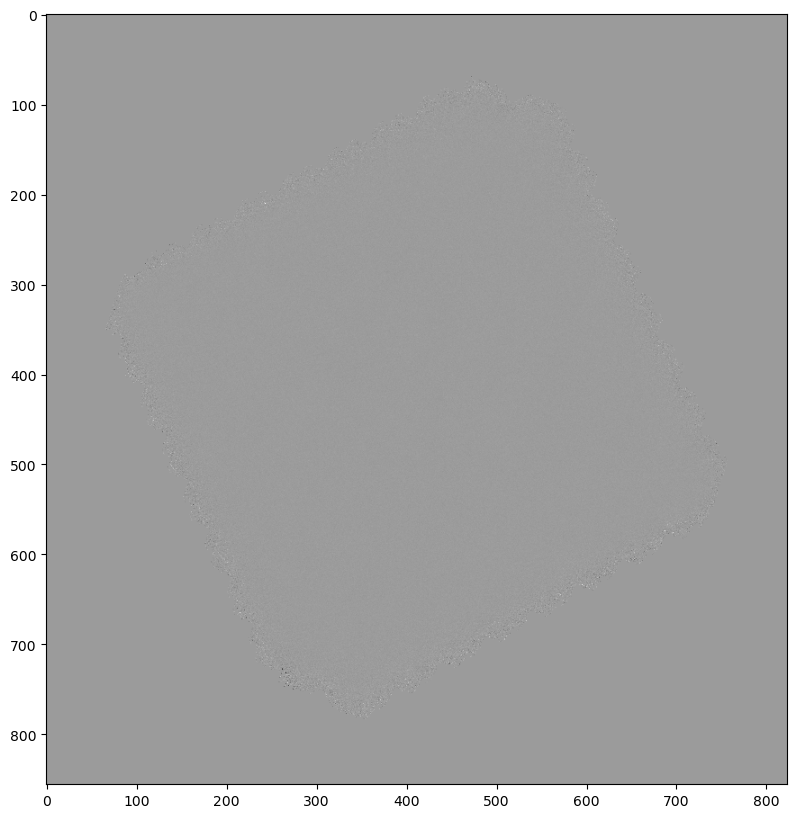

In [4]:
%matplotlib inline
from astropy.io import fits
hdutest = fits.open(r"D:\Sterrenkunde\Master Thesis\Code\Data\COSMOS-Nest_image_250_SMAP_v6.0.fits")
img_path_diff1 = "Data/COSMOS-Nest_jk_cosmos_500_SMAP_v6.0.fits"
img_path_diff2 = "Data/COSMOS-Nest_jk_cosmos2_500_SMAP_v6.0.fits"
hdul1 = fits.open(img_path_diff1)
hdul2 = fits.open(img_path_diff2)
#hdul1.verify('fix');hdul2.verify('fix')
data1 = hdul1[1].data
data2 = hdul2[1].data
noise_map = data1 - data2
noise_map[np.isnan(noise_map)] = 0
fig = plt.figure(figsize=(10,10))
plt.imshow(noise_map, cmap="gray")
#plt.show()
hdutest.close()